Titanic - Machine Learning from Disaster

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
train_df = pd.read_csv("./titanic/train.csv")
test_df = pd.read_csv("./titanic/test.csv")

In [167]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [168]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Notes:
    `SibSp:of siblings / spouses aboard the titanic`
    `Parch:of parents / children aboard the titanic`
    `Ticket: of Number`
    `Cabin: of Number`

In [169]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
train_df.set_index(train_df.PassengerId, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
train_df.drop('PassengerId', axis=1, inplace=True)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [172]:
train_df = pd.read_csv("./titanic/train.csv", index_col="PassengerId")
test_df = pd.read_csv("./titanic/test.csv", index_col="PassengerId")

In [173]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [174]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [175]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


back of null: Cabin > Age > Embarked

Carious Data Types: String, int, float

In [176]:
train_df["Survived"] = train_df["Survived"].astype("category")
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [177]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [178]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
        
convert_cat(train_df, features)
convert_cat(test_df, features)

In [179]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [180]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [181]:
train_df.describe(include=["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


Exploratory Data Analysis (EDA)

In [182]:
#Target Variable: Survival
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [183]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


In [184]:
#Sex
train_df["Sex"].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [185]:
train_df["Sex"].value_counts(normalize=True).to_frame()


,proportion
Sex,
male,0.647587
female,0.352413


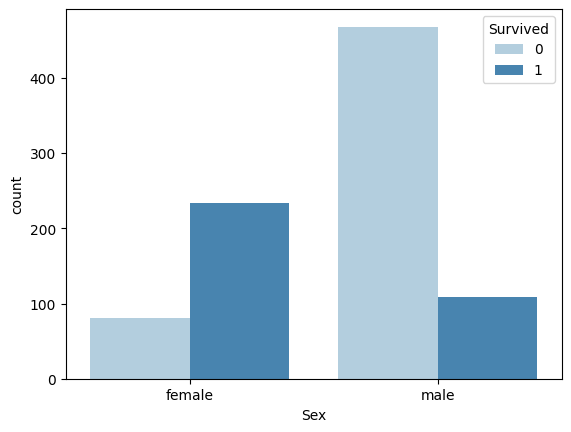

In [186]:
sns.countplot(data = train_df, x="Sex", hue="Survived" ,palette="Blues");

Remaining Categorical Features Columns

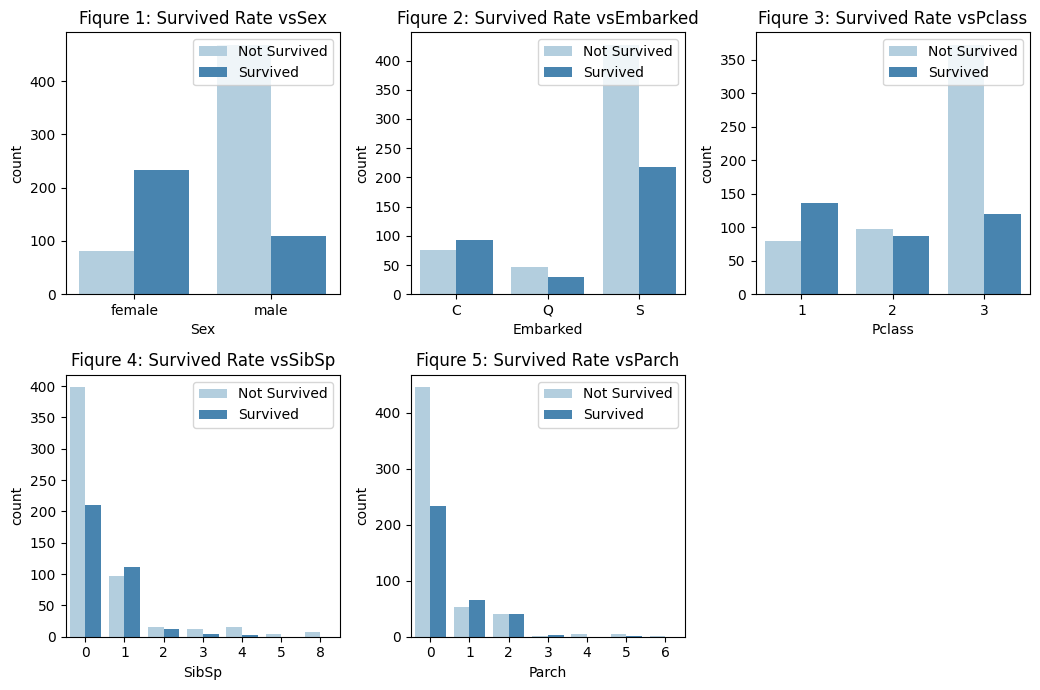

In [187]:
cols = ["Sex", "Embarked", "Pclass", "SibSp", "Parch"]

n_rows = 2
n_cols = 3

fix, ax = plt.subplots(n_rows, n_cols, figsize =(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data=train_df, x=cols[i], hue="Survived", palette="Blues", ax = ax_i)
            ax_i.set_title(f"Fiqure {i+1}: Survived Rate vs{cols[i]}")
            ax_i.legend(title = "", loc = "upper right", labels =["Not Survived", "Survived"])
ax.flat[-1].set_visible(False) #remove the last subplot
plt.tight_layout()
plt.show()

F1: Tỉ lệ nữ giới sống sót cao hơn Nam giời

F2: Cảng S > cảng C > Cảng Q

F3: Hạng Thương gia tỉ lệ sống sót cao nhất, hạng bình dân tỉ lệ chết cao nhất

F4: Đi hội anh chị em rất ít, tỉ lệ đi 1 mình chết nhiều, đi với 1 người khác tỉ lệ sống cao hơn xíu

F5: Đi với cha mẹ 

EDA

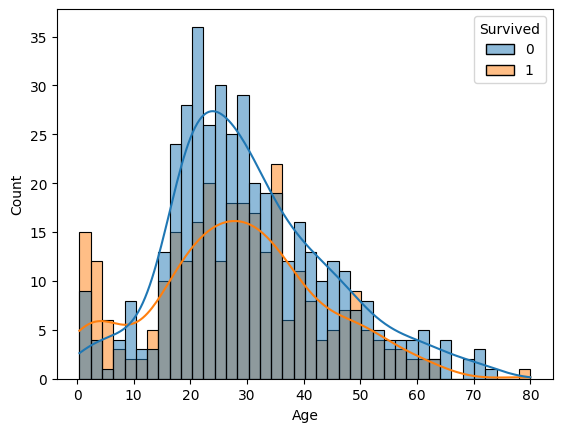

In [188]:
#AGE
sns.histplot(data = train_df, x = 'Age', hue="Survived" ,bins =40, kde=True);

-Hành khách đa số ở độ tuổi từ 18-40

-Trẻ em có nhiều cơ hội sống sót hơn các lứa tuổi khác

In [189]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

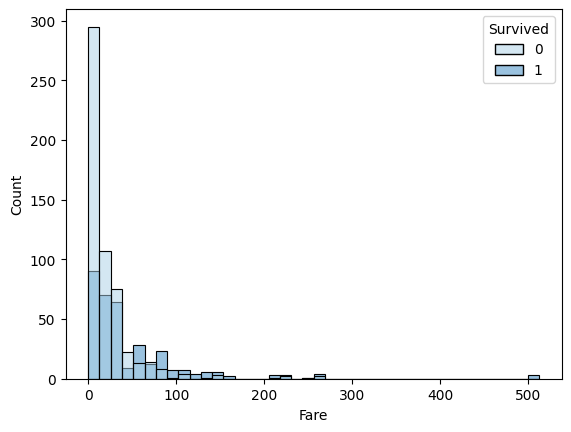

In [190]:
sns.histplot(data=train_df, x="Fare", hue="Survived",bins=40, palette="Blues");

<Axes: xlabel='Fare', ylabel='count'>

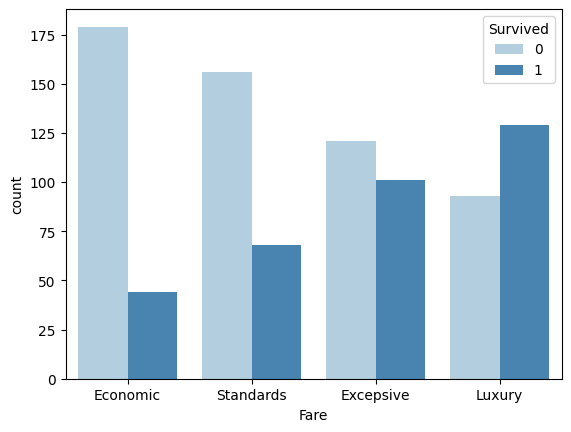

In [191]:
fare_categories = ['Economic','Standards', 'Excepsive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df['Survived'], palette="Blues")

Feature Engineering & Data Wrangling

Name

In [192]:
train_df['Name'].head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [193]:
import re

def extract_title(name):
    p = re.compile(r",(.+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [194]:
train_df['Title'].value_counts()

Title
Mr                          517
Miss                        182
Mrs                         124
Master                       40
Dr                            7
Rev                           6
Col                           2
Mlle                          2
Major                         2
Ms                            1
Mrs. Martin (Elizabeth L      1
Lady                          1
Sir                           1
Mme                           1
Don                           1
Capt                          1
the Countess                  1
Jonkheer                      1
Name: count, dtype: int64

In [195]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [196]:
def group_title(title):
    if title in ['Mr','Mrs','Miss','Master']:
        return title
    elif title == "MS":
        return "Miss"
    else:
        return"Other"

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))


<Axes: xlabel='Title', ylabel='count'>

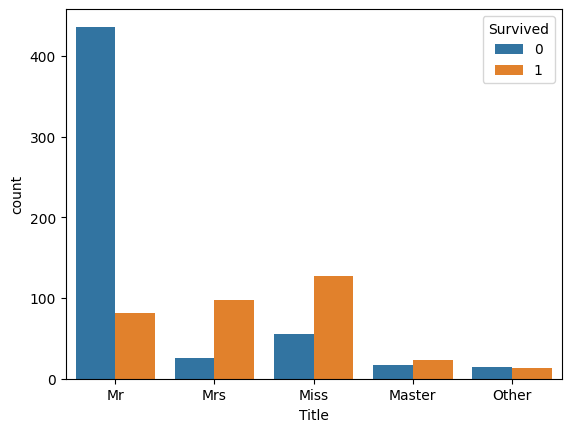

In [197]:
sns.countplot(data=train_df, x='Title', hue='Survived')

Family

-----SibSp, Parch-----

In [198]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [199]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

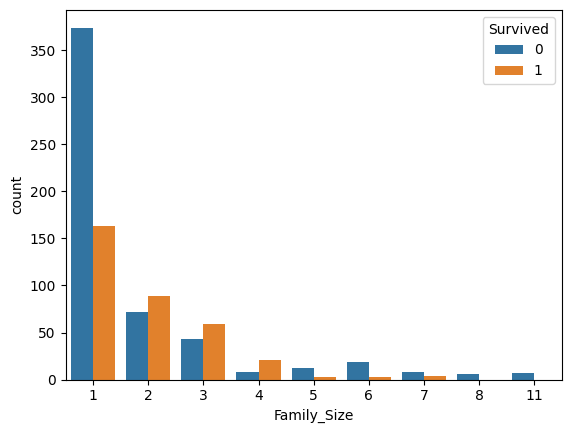

In [200]:
sns.countplot(data=train_df, x='Family_Size', hue='Survived');

In [201]:
train_df['Family_Cut']=pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo','Small', 'Medium', ' lasts'])
test_df['Family_Cut']=pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo','Small', 'Medium', ' lasts'])

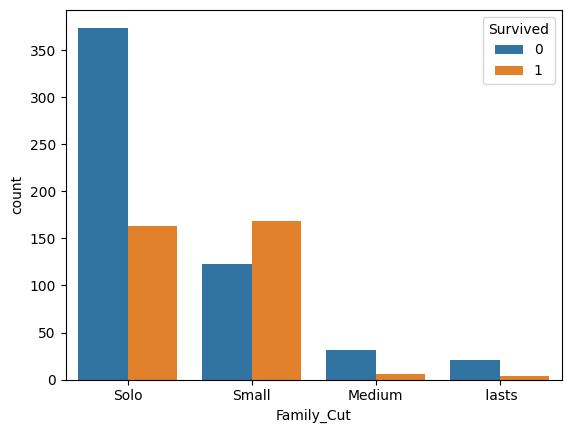

In [202]:
sns.countplot(data=train_df, x='Family_Cut', hue='Survived');

## Data Wrangling

In [203]:
num_features = ['Age', 'Fare']
Cut_Features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cut']
features_cols = num_features + Cut_Features
print(features_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cut']


In [204]:
def display_missing(df, features_cols):
    n_rows = df.shape[0]
    for col in features_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"col {col} has {missing_count*100/n_rows:.2f}% missing values.")

display_missing(train_df, features_cols)
display_missing(test_df, features_cols)


col Age has 19.87% missing values.
col Embarked has 0.22% missing values.
col Age has 20.57% missing values.
col Fare has 0.24% missing values.


---Filling missing values

----Age : Filling missing values with `median` of whole dataset 

In [205]:
# train_df['Age'] = train_df['Age'].astype(float) 
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()
print(age_by_sex_pclass)

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


In [206]:
train_df.reset_index(drop=True, inplace=True)  # Reset the index of the DataFrame
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [207]:
#filling the missing values in Age with the median of sex and Pclass groups
test_df.reset_index(drop=True, inplace=True)  # Reset the index of the DataFrame
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [208]:
display_missing(train_df, features_cols)
display_missing(test_df, features_cols)

col Embarked has 0.22% missing values.
col Fare has 0.24% missing values.


In [209]:
x = train_df[features_cols]
y = train_df['Survived']

In [210]:
x_test = train_df[features_cols]

In [211]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps= [
    ('inputer', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('inputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [212]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, Cut_Features)
])

In [213]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('inputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('inputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cut'])])

In [214]:
x = preprocessor.transform(x) # x -> x_train, x_Val

In [215]:
x_test = preprocessor.transform(x_test)

Model Traning

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
x_train, x_val, y_train, y_val = train_test_split(x, y , test_size=0.2)

In [218]:
x_train.shape, x_val.shape

((712, 19), (179, 19))

In [219]:
x_test.shape

(891, 19)

In [220]:
#binary classification
from sklearn.preprocessing import PolynomialFeatures
#sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [221]:
log_red = LogisticRegression(solver='liblinear', max_iter=1000)
log_red.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [222]:
log_red.score(x_val, y_val)

0.7932960893854749

In [223]:
y_pred = log_red.predict(x_val)

In [224]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.6818181818181818, 0.7377049180327869)

In [225]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       118
           1       0.68      0.74      0.71        61

    accuracy                           0.79       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.80      0.79      0.80       179



- y = a*x1 + b*x2 + bias -> y = a*x1^2 + b*x2^2 + c x1*x2 + bias

In [226]:
poly = PolynomialFeatures(degree=2)
poly_teatures_X_train = poly.fit_transform(x_train)
poly_features_X_val = poly.transform(x_val)

In [227]:
poly_log_red = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_red.fit(poly_teatures_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [228]:
poly_log_red.score(poly_features_X_val, y_val)

0.7821229050279329

In [229]:
#Decision Tree
decision_tree =  DecisionTreeClassifier(criterion='entropy', max_depth=8,random_state = 2022)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [230]:
decision_tree.score(x_val, y_val)

0.7932960893854749

## 5.1 Cross-validation

In [231]:
from sklearn.model_selection import cross_val_score

In [232]:
log_red_cv = LogisticRegression (solver='liblinear', max_iter=1000)
dt_cv = decision_tree =  DecisionTreeClassifier(criterion='entropy', max_depth=8,random_state = 2022)

lr_scores = cross_val_score(log_red_cv, x,y, scoring='accuracy', cv = 5)

In [233]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [234]:
dt_scores = cross_val_score(dt_cv, x,y, scoring='accuracy', cv = 5)

In [235]:
dt_scores.mean(), dt_scores.std()

(0.8069801016885318, 0.015013263122968221)

## 5.2 Baseline Model Comparison

In [236]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2023

models = [
    LinearSVC(max_iter=12000,random_state=2023),
    SVC(random_state=2023),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = seed)
]

In [242]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, x, y, metrics, cv=5, plot_results=False):
    #define k-fold
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, x, y, scoring=metrics, cv=kfold)
        for fold_idx, scores in enumerate(scores):
            entries.append((model_name, fold_idx, scores))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    if plot_results:
        # sns.boxenplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        # plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        # plt.show()
        # Vẽ biểu đồ boxenplot
        sns.boxenplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue')

        # Tính giá trị trung bình cho từng nhóm
        means = cv_df.groupby('model_name')['accuracy_score'].mean()

        # Vẽ giá trị trung bình bằng dấu '+'
        plt.plot(range(len(means)), means, marker='+', linestyle='', color='red')

        # Cập nhật nhãn x cho các nhóm
        plt.xticks(range(len(means)), means.index, rotation=90)

        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.show()

    # Summary results
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean', 'StandardScaler']

    #sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
    return baseline_results

generate_baseline_results(models, x, y, metrics='accuracy', cv=5, plot_results=False)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  war

,Mean,StandardScaler
model_name,,
SVC,0.837267,0.031492
LinearSVC,0.826044,0.037442
LogisticRegression,0.826044,0.031238
XGBClassifier,0.824889,0.015911
AdaBoostClassifier,0.820400,0.032911
RandomForestClassifier,0.817023,0.021559
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.801318,0.020784
DecisionTreeClassifier,0.797979,0.014332
